# INMERSIÓN DE DATOS CON PYTHON

## **PROBLEMA DE NEGOCIO**

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

1. **Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. **Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. **Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. **Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.

# 1. Configuración del Ambiente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preprocesamiento de Datos

In [2]:
pd.set_option('display.max_columns',None)
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df_banco.shape

(1000, 21)

In [5]:
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
columns = list(df_banco.select_dtypes(include = ["object"]).columns)
columns

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [8]:
df_banco.account_check_status.value_counts()

account_check_status
no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: count, dtype: int64

In [9]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [10]:
for columna in columns:
    print(f"El nombre de la columna: {columna}")
    print(list(df_banco[f"{columna}"].value_counts().index))
    print('\n')

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [11]:
dic = {'yes':1,'no':0}
df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
df_banco['foreign_worker']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: foreign_worker, Length: 1000, dtype: int64

In [12]:
def procesar_datos():
    global df_banco
    df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
    df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

    a = {'no checking account': 4,
         '>= 200 DM / salary assignments for at least 1 year': 3,
         '0 <= ... < 200 DM': 2,
         '< 0 DM': 1
    }
    df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

    a = { 'no credits taken/ all credits paid back duly' : 1,
          'all credits at this bank paid back duly' : 2,
          'existing credits paid back duly till now' : 3,
          'delay in paying off in the past' : 4,
          'critical account/ other credits existing (not at this bank)' : 5
    }
    df_banco['credit_history'] = df_banco['credit_history'].map(a)

    a = {'car (new)' : 1,
         'car (used)' : 2,
         'furniture/equipment' : 3,
         'radio/television' : 4,
         'domestic appliances' : 5,
         'repairs' : 6,
         'education' : 7,
         '(vacation - does not exist?)' : 8,
         'retraining' : 9,
         'business' : 10,
         'others' : 11
    }
    df_banco['purpose'] = df_banco['purpose'].map(a)

    a = {'unknown/ no savings account' : 1,
         '.. >= 1000 DM ' : 2,
         '500 <= ... < 1000 DM ' : 3,
         '100 <= ... < 500 DM' : 4,
         '... < 100 DM' : 5
    }
    df_banco['savings'] = df_banco['savings'].map(a)

    a = {'.. >= 7 years' : 1,
         '4 <= ... < 7 years' : 2,
         '1 <= ... < 4 years' : 3,
         '... < 1 year ' : 4,
         'unemployed' : 5
    }
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

    a = {'male : divorced/separated' : 1,
         'female : divorced/separated/married' : 2,
         'male : single' : 3,
         'male : married/widowed' : 4,
         'female : single' : 5
    }
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

    a = {'none' : 1,
         'co-applicant' : 2,
         'guarantor' : 3
    }
    df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

    a = {'real estate' : 1,
         'if not A121 : building society savings agreement/ life insurance' : 2,
         'if not A121/A122 : car or other, not in attribute 6' : 3,
         'unknown / no property' : 4
    }
    df_banco['property'] = df_banco['property'].map(a)

    a = {'bank' : 1,
         'stores' : 2,
         'none' : 3
    }
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

    a = {'rent' : 1,
         'own' : 2,
         'for free' : 3
    }
    df_banco['housing'] = df_banco['housing'].map(a)

    a = {'unemployed/ unskilled - non-resident' : 1,
         'unskilled - resident' : 2,
         'skilled employee / official' : 3,
         'management/ self-employed/ highly qualified employee/ officer' : 4
    }
    df_banco['job'] = df_banco['job'].map(a)

    a = {'yes, registered under the customers name ' : 1,
      'none' : 0
    }
    df_banco['telephone'] = df_banco['telephone'].map(a)

    #a = {'yes' : 1,
    #     'no' : 0
    #}
    #df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [13]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
603,1,4,36,3,4,3349,5,3,4,2,1,2,3,28,3,2,1,4,1,1,1
851,0,4,24,5,2,4042,1,2,3,3,1,4,2,43,3,2,2,3,1,1,1
338,0,1,24,3,4,4169,5,3,4,3,1,4,2,28,3,2,1,3,1,0,1


# 3. Exploración de Datos

In [14]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3)

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [15]:
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [16]:
def feature_engineering():
    global df_banco
    dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
    dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
    df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
    df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                    bins=[18, 30, 40, 50, 60, 70, 80],
                                    labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
    df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
    df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                      'duration_in_month','credit_amount'])

In [17]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [18]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


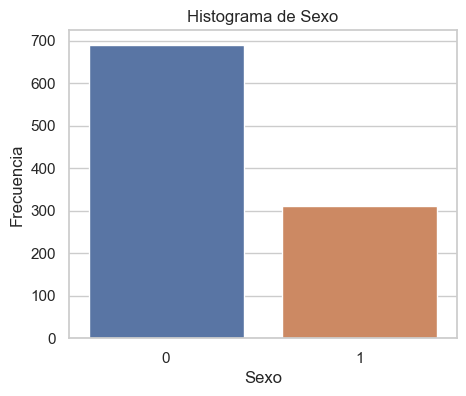

In [19]:
# Configurando el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [20]:
def analisis_exploratorio():
    global df_banco
    histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
    lista_histogramas = list(enumerate(histogramas))
    plt.figure(figsize = (30,20))
    plt.title('Histogramas')
    for i in lista_histogramas:
        plt.subplot(3, 2, i[0]+1)
        sns.countplot(x = i[1], data = df_banco)
        plt.xlabel(i[1], fontsize=20)
        plt.ylabel('Total', fontsize=20)

C:\Users\Acer\AppData\Local\Temp\ipykernel_6064\217049323.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, i[0]+1)


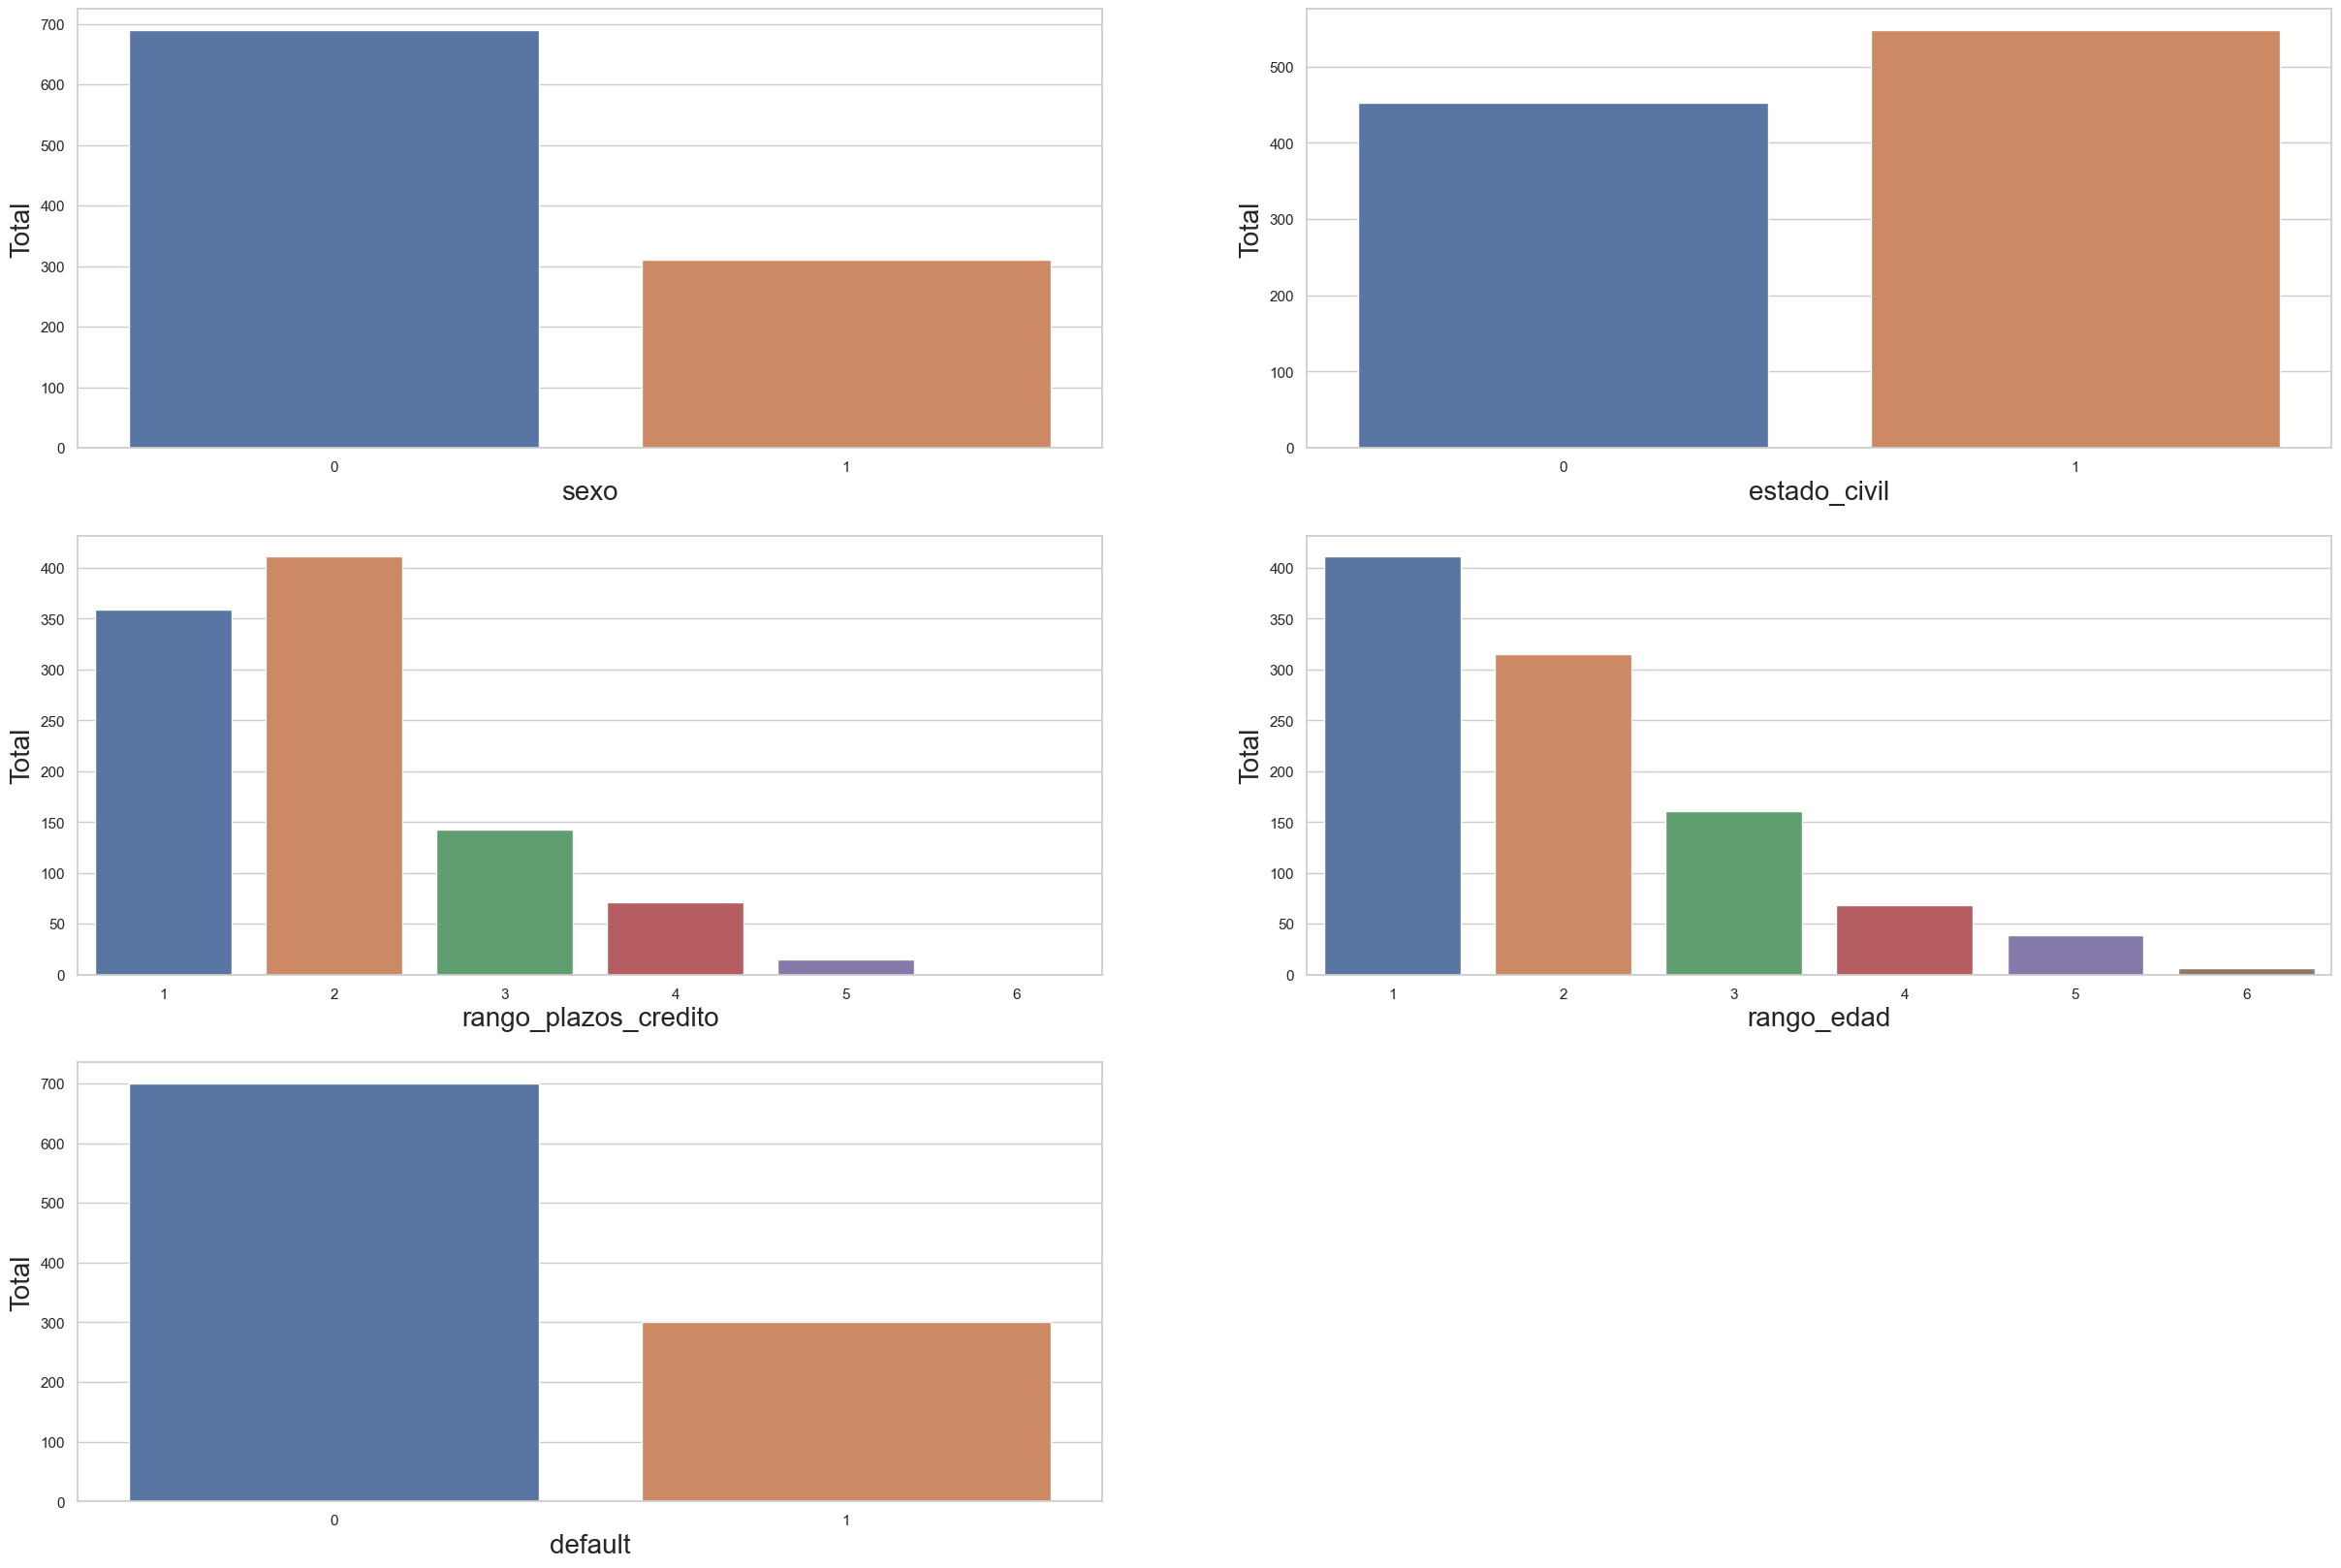

In [21]:
analisis_exploratorio()

# Desafíos

1. Analizar los datos de las distribuciones e identificar si hay algún valor o registros que no se deben considerar para el modelo.
2. Investigar qué es y como crear un mapa de calor para analizar la correlación de las variables.
3. Crear una conclusión para cada uno de los gráficos del histograma. Mirar los datos y extraer conclusiones, porque es una habilidad esencial.

### Distintas formas de encontrar una matriz de correlación

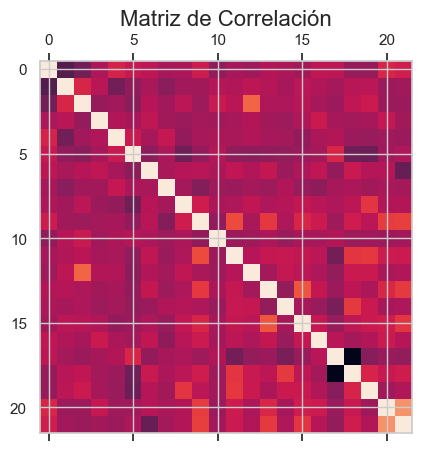

In [22]:
plt.matshow(df_banco.corr())
plt.title('Matriz de Correlación', fontsize=16);
plt.show()

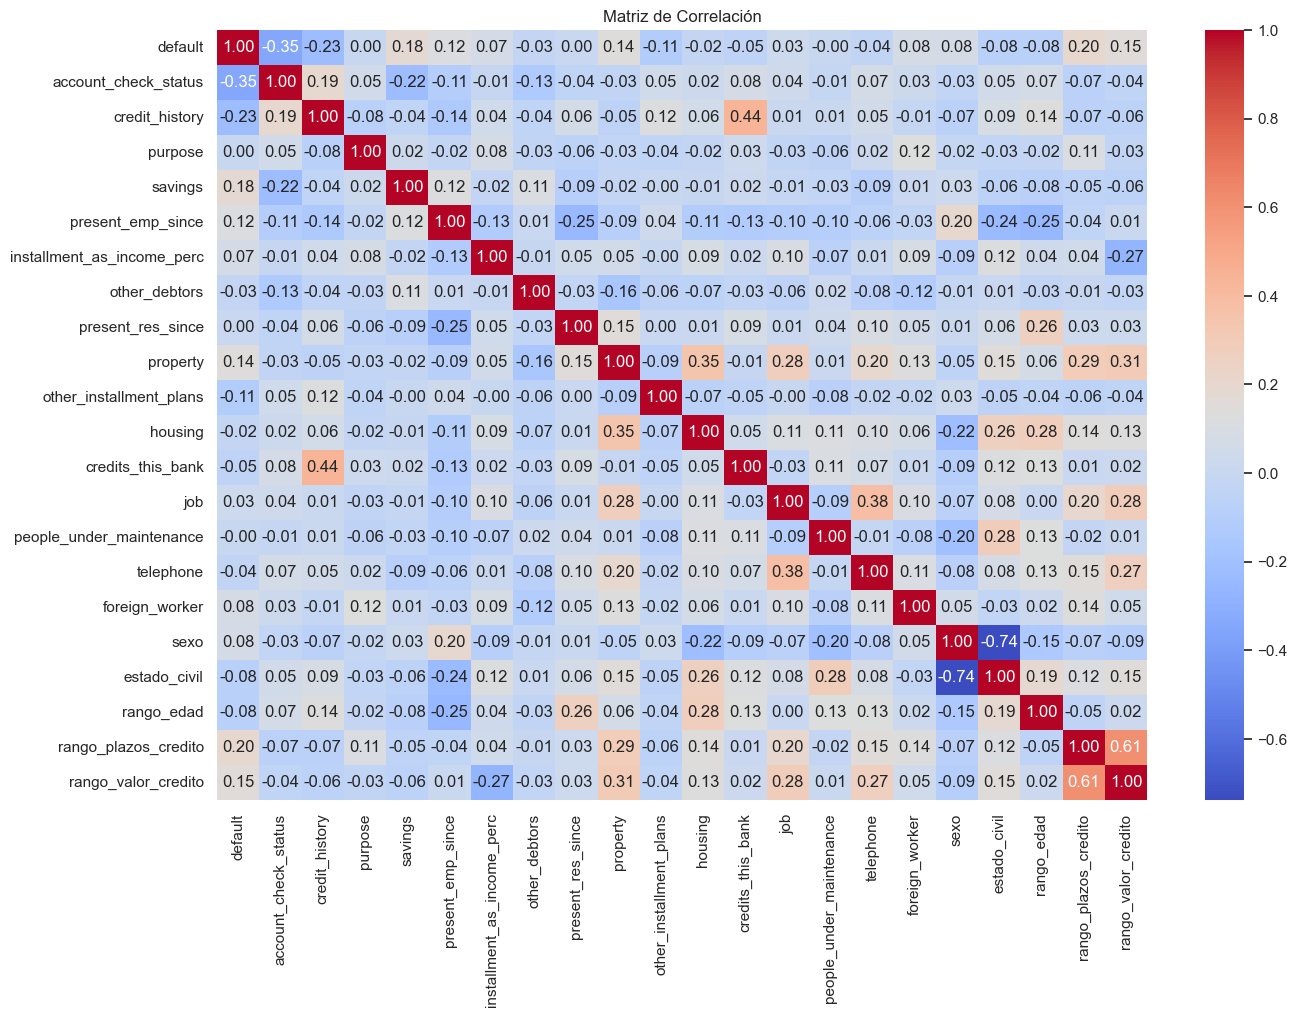

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_banco.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [24]:
correlation_matrix = df_banco.corr()
correlation_matrix

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
default,1.000000,-0.350847,-0.228785,0.001514,0.178943,0.116002,0.072404,-0.025137,0.002967,0.142612,-0.109844,-0.019315,-0.045732,0.032735,-0.003015,-0.036466,0.082079,0.075493,-0.080677,-0.080878,0.197321,0.152609
account_check_status,-0.350847,1.000000,0.192191,0.053223,-0.222867,-0.106339,-0.005280,-0.127737,-0.042234,-0.032260,0.046841,0.022424,0.076005,0.040663,-0.014145,0.066296,0.026758,-0.025578,0.052436,0.066129,-0.069531,-0.042596
credit_history,-0.228785,0.192191,1.000000,-0.081634,-0.039058,-0.138225,0.044375,-0.040676,0.063198,-0.053777,0.121973,0.062095,0.437066,0.010350,0.011550,0.052370,-0.013873,-0.071802,0.086008,0.136850,-0.068134,-0.060757
purpose,0.001514,0.053223,-0.081634,1.000000,0.024072,-0.024990,0.078224,-0.032254,-0.062927,-0.031025,-0.039346,-0.019488,0.034958,-0.032655,-0.056450,0.018677,0.124317,-0.017271,-0.025536,-0.019125,0.109430,-0.034348
savings,0.178943,-0.222867,-0.039058,0.024072,1.000000,0.120950,-0.021993,0.105069,-0.091424,-0.018948,-0.001908,-0.006505,0.021644,-0.011709,-0.027514,-0.087208,0.007095,0.034982,-0.060384,-0.077021,-0.046870,-0.064577
present_emp_since,0.116002,-0.106339,-0.138225,-0.024990,0.120950,1.000000,-0.126161,0.008116,-0.245081,-0.087187,0.040154,-0.111126,-0.125791,-0.101225,-0.097192,-0.060518,-0.027232,0.197009,-0.238857,-0.254865,-0.039019,0.012082
installment_as_income_perc,0.072404,-0.005280,0.044375,0.078224,-0.021993,-0.126161,1.000000,-0.011398,0.049302,0.053391,-0.000983,0.089405,0.021669,0.097755,-0.071207,0.014413,0.090024,-0.086302,0.118233,0.039153,0.043738,-0.269688
other_debtors,-0.025137,-0.127737,-0.040676,-0.032254,0.105069,0.008116,-0.011398,1.000000,-0.025678,-0.155450,-0.059023,-0.065889,-0.025447,-0.057963,0.020400,-0.075035,-0.117999,-0.013359,0.006481,-0.034876,-0.009469,-0.031247
present_res_since,0.002967,-0.042234,0.063198,-0.062927,-0.091424,-0.245081,0.049302,-0.025678,1.000000,0.147231,0.002089,0.011941,0.089625,0.012655,0.042643,0.095359,0.054097,0.013818,0.063639,0.262699,0.033841,0.031096
property,0.142612,-0.032260,-0.053777,-0.031025,-0.018948,-0.087187,0.053391,-0.155450,0.147231,1.000000,-0.090033,0.345219,-0.007765,0.276149,0.011872,0.196802,0.132462,-0.051455,0.145125,0.064859,0.290379,0.305677


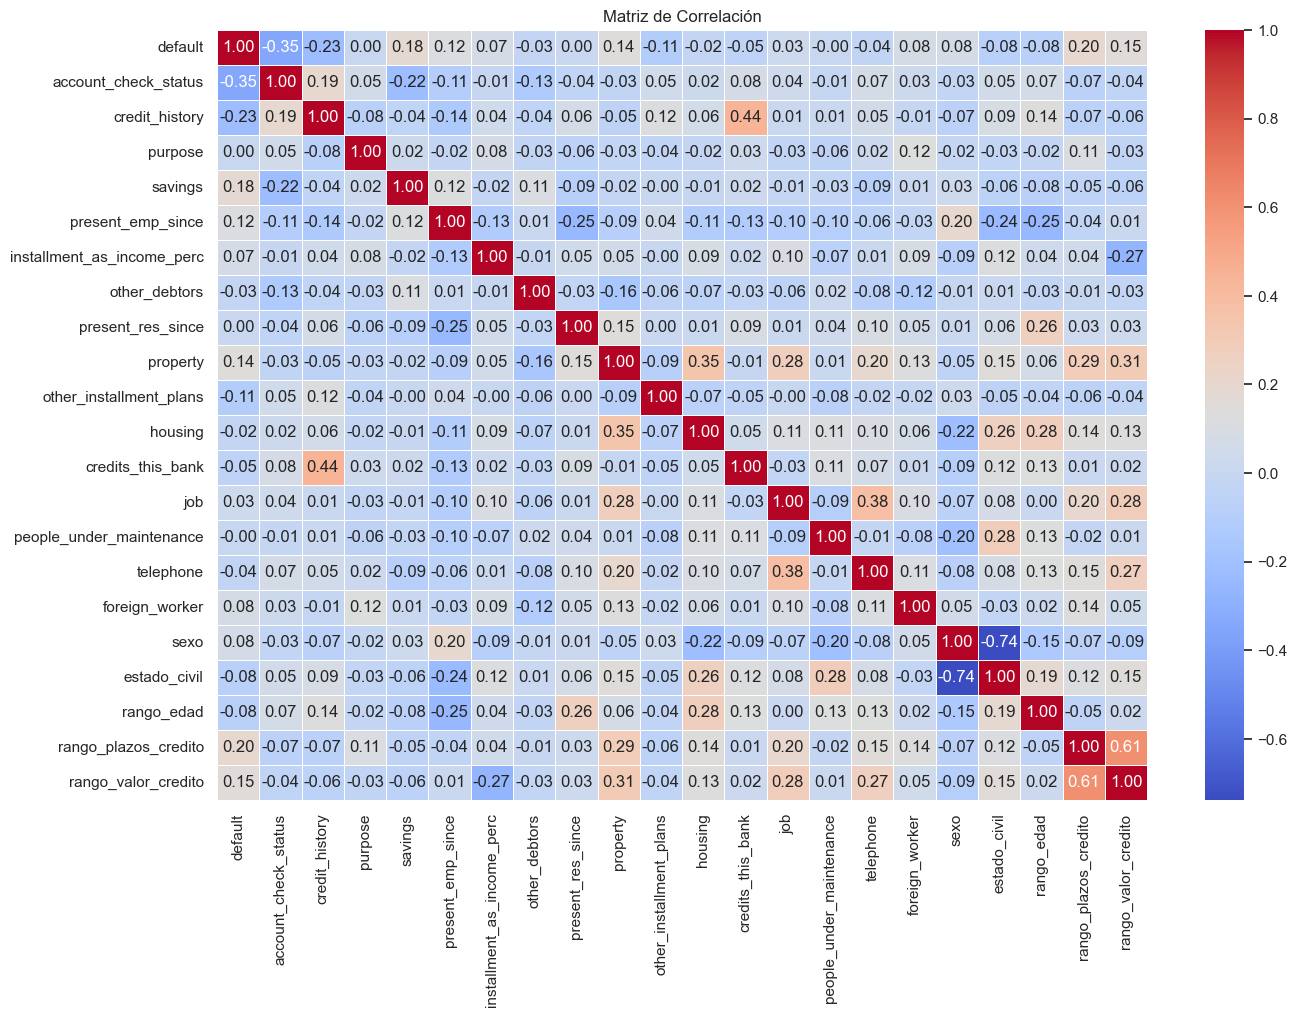

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# 4. Construcción de Modelos

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [27]:
#@title
def crea_modelos():
    global df_banco, resultados
    y = df_banco['default']
    x = df_banco.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state = 77)

    models = {
        'Regresión Logística': LogisticRegression(),
        'Árbol de Decisión': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    resultados = results

In [28]:
crea_modelos()
for i, model in enumerate(resultados['Model']):
    print(model)
    print(resultados['Accuracy'][i])
    print(resultados['Precision'][i])
    print(resultados['Recall'][i])
    print(resultados['F1-score'][i])
    print(resultados['AUC-ROC'][i])
    print('\n')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Regresión Logística
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Árbol de Decisión
0.6933333333333334
0.4605263157894737
0.4069767441860465
0.4320987654320987
0.6076939795696589


Random Forest
0.7733333333333333
0.68
0.3953488372093023
0.5
0.7959139317539665


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# 5. Evaluación y Selección del Modelo

In [29]:
#@title
def visualiza_resultados():
    global df_banco, resultados
    results_df = pd.DataFrame(resultados)
    results_df.set_index('Model', inplace=True)

    # Transponer el DataFrame para facilitar la representación
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

    # Gráfico de barras agrupadas para cada métrica
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparación de Métricas por Modelo')
    plt.xlabel('Métricas')
    plt.ylabel('Puntuación')
    plt.legend(title='Modelos')
    plt.tight_layout()
    plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_6064\846933959.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
C:\Users\Acer\AppData\Local\Temp\ipykernel_6064\846933959.py:12: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)


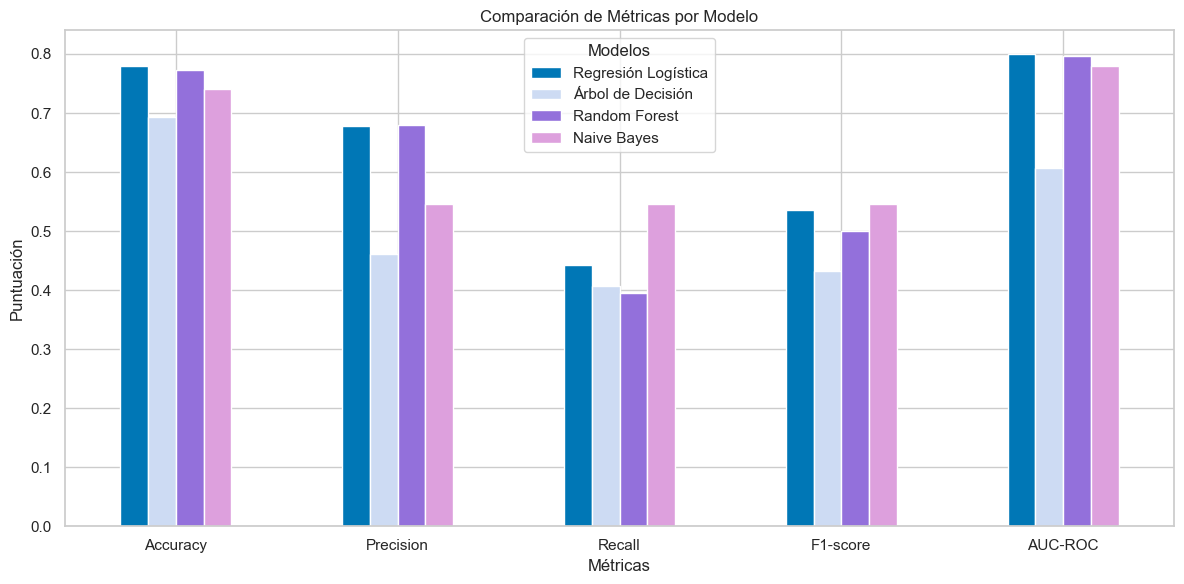

In [30]:
visualiza_resultados()

In [31]:
X = df_banco.drop('default', axis=1)
y = df_banco['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3. Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 4. Evaluar el modelo
predicciones = modelo.predict(X_test)
accuracy = accuracy_score(y_test, predicciones)
print(f'Accuracy: {accuracy}')

Accuracy: 0.772


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
from sklearn.metrics import confusion_matrix

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB()
]

model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]

labels = ["No Default", "Default"]

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    print(f"Model: {model_names[i]}")
    print(cm)
    print(labels)
    print()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
[[160  18]
 [ 39  33]]
['No Default', 'Default']

Model: Decision Tree
[[130  48]
 [ 35  37]]
['No Default', 'Default']

Model: Random Forest
[[162  16]
 [ 41  31]]
['No Default', 'Default']

Model: Naive Bayes
[[135  43]
 [ 26  46]]
['No Default', 'Default']



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


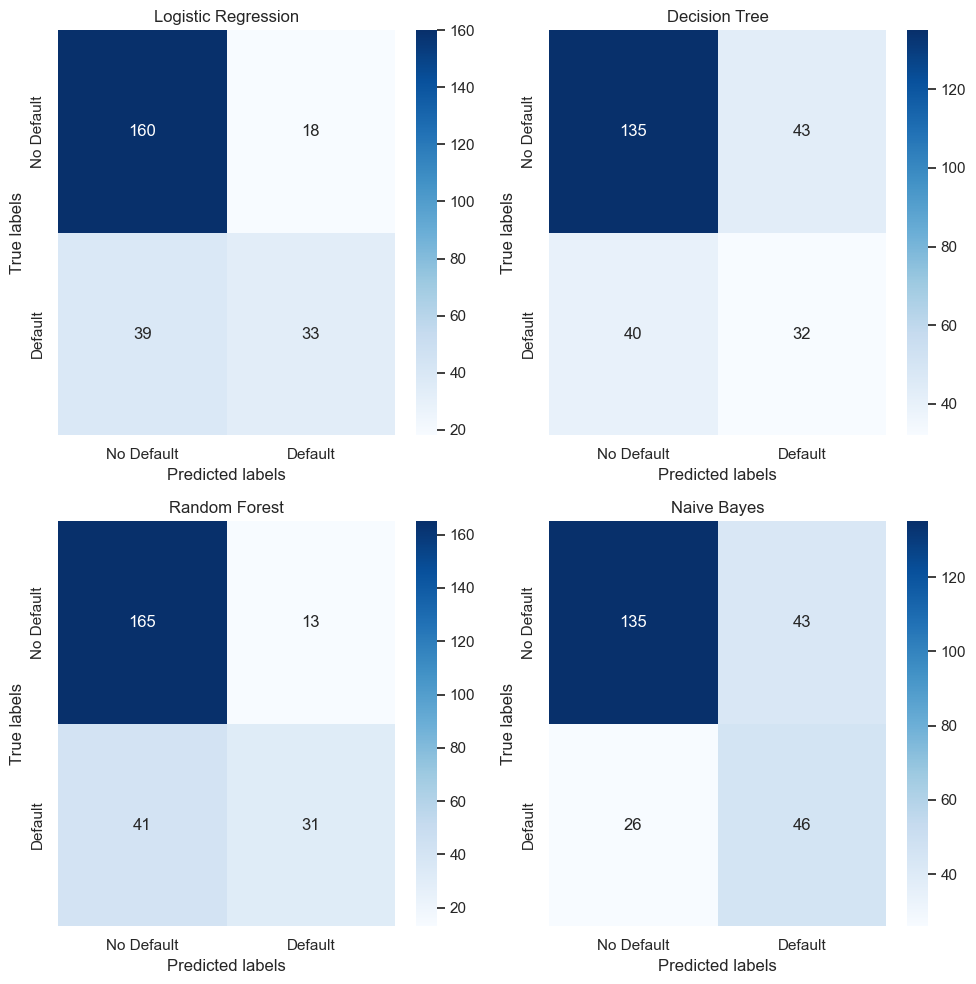

In [33]:
labels = ["No Default", "Default"]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    models[i].fit(X_train, y_train)
    predictions = models[i].predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(model_names[i])
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)

plt.tight_layout()
plt.show()